# What's happening in SA

In [714]:
#data wrangle
import pandas as pd
import numpy as np
import re

#aquire data
import requests
from bs4 import BeautifulSoup

#plot
import matplotlib.pyplot as plt 
import seaborn as sns

## Acquire

Obatined COVID data for Bexar county here: https://www.sanantonio.gov/Health/News/Alerts/CoronaVirus#281783804-public-info- 

I'm glad they're posting the COVID data for people's consumption. However, it's not available in a csv or json or api for the data scientist. #thanksbutnothanks 

Time to webscrape.

In [715]:
response = requests.get("https://www.sanantonio.gov/Health/News/Alerts/CoronaVirus#281783804-public-info-")

In [716]:
soup = BeautifulSoup(response.text, 'html.parser')

In [717]:
table = soup.find_all("table",{"class":"covidData"})

In [718]:
def make_df(table_no):
    data = []

    #get table data
    table_title = table[table_no].find('thead')
    table_body = table[table_no].find('tbody')

    #create header
    rows = table_title.find_all('tr')
    for row in rows:
        titles = row.find_all('th')
        header = []
        for title in titles[:2]:
            title = title.text
            title = re.sub('\n\s+',' ',title)
            title = title.lower()
            header.append(title)

    #create body
    rows = table_body.find_all('tr')
    for row in rows:
        name = row.find('th').text
        name = re.sub('\n\s+', '', name)
        name = name.strip()

        col = row.find('td').text
        col = int(col)
        data.append([name, col])

    return pd.DataFrame(data, columns=header) #return df

## Prepare & Explore

### Total Cases

In [719]:
df = make_df(0)
df

,case status and source of exposure,number
0,Total Confirmed cases Bexar County*,229
1,Travel-related,70
2,Close contact,33
3,Community transmission,66
4,Under investigation,60


In [721]:
df = df.rename(columns={"case status and source of exposure":"source"})

In [722]:
subset = df.loc[1:,]
subset

,source,number
1,Travel-related,70
2,Close contact,33
3,Community transmission,66
4,Under investigation,60


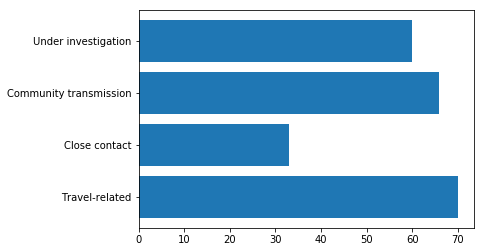

In [726]:
plt.barh(subset.source,subset.number)
plt.show()

### Total Tests

In [727]:
df = make_df(9)
df

,testing by metro health laboratory,number
0,Negative,594
1,Positive,70
2,Inconclusive,1
3,Total tested by Metro Health Lab,665


In [728]:
df = df.rename(columns={"testing by metro health laboratory":"testing"})

In [729]:
subset = df.loc[0:2,]
subset

,testing,number
0,Negative,594
1,Positive,70
2,Inconclusive,1


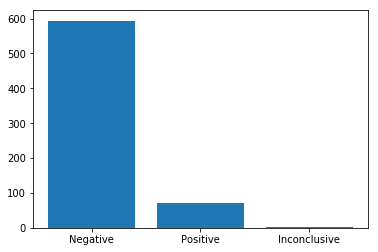

In [730]:
plt.bar(subset.testing,subset.number)
plt.show()

### Hopitalizations

In [731]:
data = []

table_title = table[1].find('thead')
table_body = table[1].find('tbody')

# create header
rows = table_title.find_all('tr')
for row in rows:
    titles = row.find_all('th')
    header = []
    for title in titles[:2]:
        if len(title) > 0:
            title = title.text
            title = re.sub('\n\s+',' ',title)
            title = title.lower()
        else:
            title = "none"
        header.append(title)

#create body
rows = table_body.find_all('tr')
for row in rows:
    subrows = row.find_all('td')
    for subrow in subrows[:2]:
        subrow = subrow.text
        subrow = re.sub('\s+',' ',subrow) 
        data.append(subrow)
        
#split array in half
data = np.array_split(data,2)

df = pd.DataFrame(data, columns = header)
df

,none,number
0,Not Hospitalized,111
1,Ever Hospitalized,61


In [732]:
df = df.rename(columns={"none":"status","Number":"number"})
df.number = df.number.astype("int")

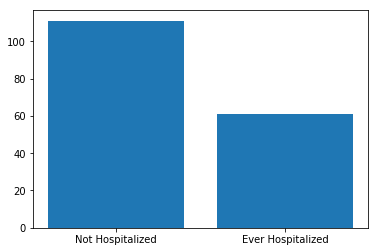

In [733]:
plt.bar(df.status,df.number)
plt.show()

### Hospital Characteristics

In [734]:
# df.make_df(2)

### Hospitial Visit

In [735]:
df = make_df(3)
df

,medical visit type,number
0,Drive Through,29
1,Clinic/Provider,38
2,Urgent Care/Emergency Department,116


In [736]:
df = df.rename(columns={"medical visit type":"type"})

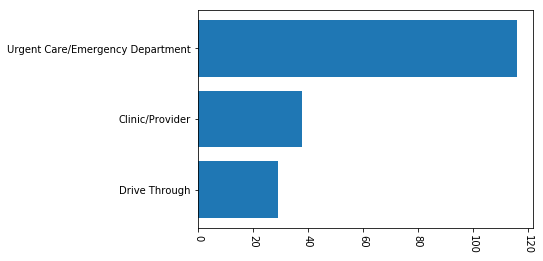

In [738]:
plt.barh(df.type, df.number)
plt.xticks(rotation=-90)
plt.show()

### Cases and Deaths by Gender

In [756]:
df_cases = make_df(4)
df_cases

,gender,number of cases
0,Male,117
1,Female,112


In [757]:
df_deaths = make_df(7)
df_deaths

,gender,number
0,Male,3
1,Female,6


In [758]:
df_cases = df_cases.rename(columns={"number of cases":"cases"})
df_deaths = df_deaths.rename(columns={"number":"deaths"})

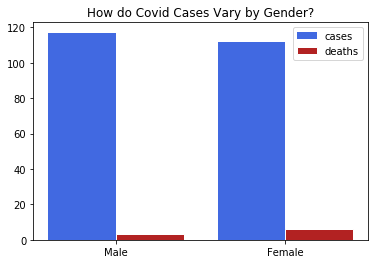

In [760]:
barWidth = 0.4
 
# set position of bar on x axis
r1 = np.arange(len(df_cases))
r2 = [x + barWidth for x in r1]
 
# plot
plt.bar(r1, df_cases.cases, color='royalblue', width=barWidth, label='cases')
plt.bar(r2, df_deaths.deaths, color='firebrick', width=barWidth, edgecolor='white', label='deaths')

plt.title("How do Covid Cases Vary by Gender?")
plt.xticks([r + barWidth/2 for r in range(len(df_cases))], ['Male', 'Female'])
plt.legend(loc=1)
plt.show()

### Cases and Deaths by Age

In [762]:
df_cases = make_df(5)
df_cases

,age group (in years),number
0,0-19,9
1,20-29,36
2,30-39,29
3,40-49,51
4,50-59,45
5,60-69,35
6,70-79,19
7,80-89,5


In [763]:
df_deaths = make_df(8)
df_deaths

,age group (in years),number
0,0-19,0
1,20-29,0
2,30-39,0
3,40-49,2
4,50-59,3
5,60-69,1
6,70-79,0
7,80-89,3


In [764]:
df_cases = df_cases.rename(columns={"age group (in years)":"age","number":"cases"})
df_deaths = df_deaths.rename(columns={"age group (in years)":"age","number":"deaths"})

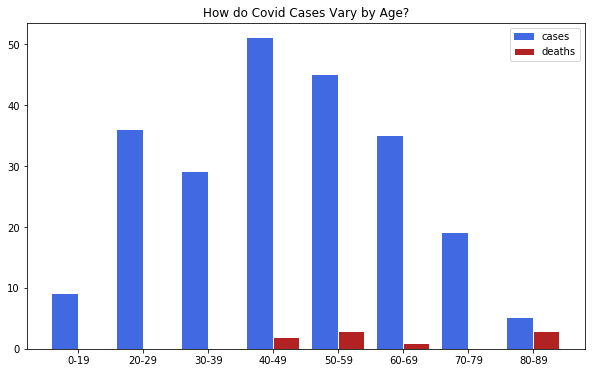

In [765]:
plt.figure(figsize=(10,6))

barWidth = 0.4
 
# set position of bar on x axis
r1 = np.arange(len(df_cases))
r2 = [x + barWidth for x in r1]
 
# plot
plt.bar(r1, df_cases.cases, color='royalblue', width=barWidth, label='cases')
plt.bar(r2, df_deaths.deaths, color='firebrick', width=barWidth, edgecolor='white', label='deaths')

plt.title("How do Covid Cases Vary by Age?")
plt.xticks([r + barWidth/2 for r in range(len(df_cases))], list(df_cases.age))
plt.legend(loc=1)
plt.show()